Aline Abayo, Eleanor Adachi, Anna Cheyette, Karla Neri and Stephen Stack

***Note: We are submitting Exercises plus Problems 3 (Convolutions), 4 (General Weighted Linear Regressions), 5 (Simultaneous Equations), and 7 (Food Expenditures in India).***

# Admin

We created a fork of the main GitHub repository. Our fork can be found here: https://github.com/eleanor-adachi/ARE212_Materials

The final version of the code for Assignment 1 is here: https://github.com/eleanor-adachi/ARE212_Materials/blob/master/Assignments/assignment1/are212_assignment1.ipynb

# Exercises

## From ARE210, recall (Section 9 in Mahajan’s “Handout 1”) the rule for computing the distribution of certain transformations of random variables (the “inverse Jacobian rule”). Let $(x, y)$ be independently distributed continuous random variables possessing densities $f_x$ and $f_y$. Let $z = x+y$. Use the rule to obtain an expression for the distribution of $z$.

Given two random variables $x$ and $y$ where $y=f(x)$ and $x$ has probability density function $p_x(x)$

Then $p_y(y) = p_x(x)|\frac{dx}{dy}| = p_x(x)|\frac{df^{-1}(y)}{dy}|$

For $z = x + y$ where $x$ has probability density function $f_x(x)$ and $y$ has probability density function $f_y(y)$,

$f_z(z) = f_x(x)|\frac{\partial x}{\partial z}| \cdot f_y(y)|\frac{\partial y}{\partial z}|$

$x = z - y$ and $y = z - x$, so $\frac{\partial x}{\partial z} = 1$ and $\frac{\partial y}{\partial z} = 1$

Therefore, $z$ has a continuous distribution with probability density $f_z$ given by

$f_z(z) = \int_{-\infty}^{\infty} f_x(x) f_y(z-x) \,dx$

## We've discussed ways to program a convolution of random variables in a Jupyter notebook. As in the notebook, consider a discrete random variable $s$ and a continuous random variable $x$. Prove that the convolution of $s$ and $x$ (or, informally, $x+s$) has a continuous distribution, as suggested by the figure at the end of the notebook, or establish that the figure is wrong or misleading.

*Definition*: a convolution occurs when two mathematical functions are combined. In this context, we are combining two functions that give the probability distributions of random variables, and creating a new probability distribution which is a sum of those two.

In this case, we are interested in convolutions of a continuous and a random variable, and we want to prove that the convolved distribution is continuous. As suggested in the lecture, a proof of this is that it has a density, rather than being a collection of mass points.

First, let's set up a similar pair of distributions as was done in lecture.

In [1]:
""" First, a continuous random variable x"""
from   scipy.stats import distributions as iid
from   scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

# Let's customize this distribution
mean  = 2
sigma = 2

x = iid.norm(loc=mean, scale=sigma)

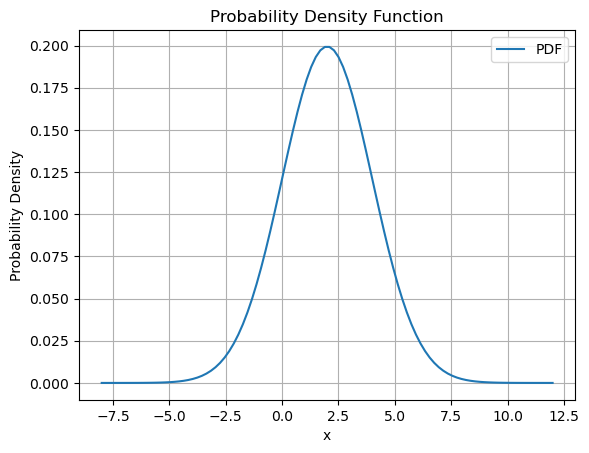

In [2]:
""" Let's take a look at the pdf for this distribution """
# x-values
x_values = np.linspace(mean - 5*sigma, mean + 5*sigma, 100)

# Get PDF
pdf_values = x.pdf(x_values)

# Plot
plt.plot(x_values, pdf_values, label='PDF')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Probability Density Function')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
""" Next, do a discrete variable"""
omega =(-5, -2, 0, 3, 10)
Pr    =(1/12, 3/12, 1/12, 2/12, 5/12)

s = iid.rv_discrete(values=(omega, Pr))

[0.08333333 0.25       0.08333333 0.16666667 0.41666667]


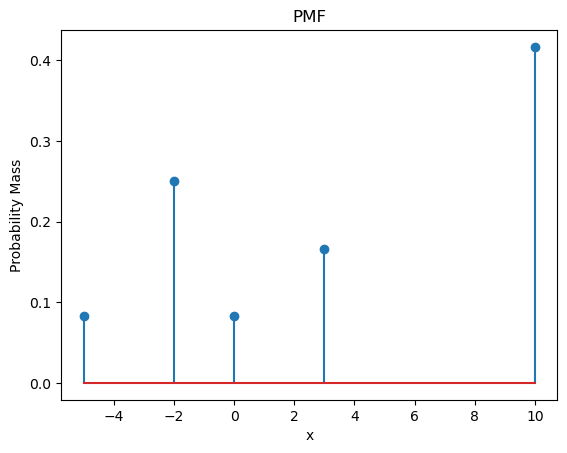

In [4]:
""" Next do the probability mass function for this """
# PMF
pmf_values = s.pmf(omega)
print(pmf_values)

# Plot this
plt.stem(omega, pmf_values, markerfmt='o', linefmt='-')
plt.xlabel('x')
plt.ylabel('Probability Mass')
plt.title('PMF')
plt.show()


Next, define the convolved distribution

In [5]:
from scipy.stats import distributions as iid

# Code to convolve a random variable with a pmf and another having a cdf
# Exploits =scipy.stats= base rv_continuous class.

class ConvolvedContinuousAndDiscrete(iid.rv_continuous):

    """Convolve (add) a continuous rv x and a discrete rv s,
       returning the resulting cdf."""

    def __init__(self,f,s):
        self.continuous_rv = f
        self.discrete_rv = s
        super(ConvolvedContinuousAndDiscrete, self).__init__(name="ConvolvedContinuousAndDiscrete")
        
    def _cdf(self,z):
        F=0
        s = self.discrete_rv
        x = self.continuous_rv
        
        for k in range(len(s.xk)):
            F = F + x.cdf(z-s.xk[k])*s.pk[k]
        return F

    def _pdf(self,z):
        f=0
        s = self.discrete_rv
        x = self.continuous_rv
        
        for k in range(len(s.xk)):
            f = f + x.pdf(z-s.xk[k])*s.pk[k]
        return f


# Create new convolved rv:
y = ConvolvedContinuousAndDiscrete(x,s)

In [6]:
import plotly.graph_objects as go
import numpy as np

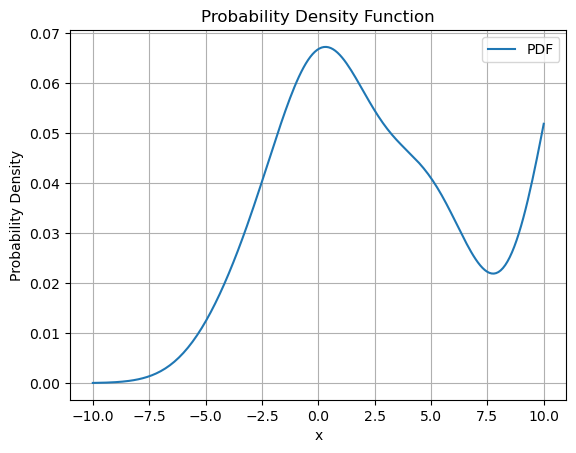

In [7]:
X          = np.linspace(-10,10,200).tolist()
y_values   = [y.pdf(z) for z in X]

# Plot
plt.plot(X, y_values, label='PDF')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Probability Density Function')
plt.legend()
plt.grid(True)
plt.show()

We can show that the resulting distribution is continuous by comparing the properties of the pdf and pmf that we see above. For the PDF, for any point between the min and max value of the distribution (e.g. from eyeballing the continuous distribution above, -7.5 to 10) the pdf will give a probability value > 0. This means we can put in any continuous figure in this range, and get a positive.

For the pmf, in contrast, the probability will only be greater than zero if the point we input to the pmf function equals one of the possible values of the distribution, e.g. any point x where 3 < x < 10 will have p(x) = 0.

As such, we can perform a simple test on this will be to take the convolved probability function that is defined above, and input a set of continuous points over a very small range. If this function was a probability mass function, it would be extremely unlikely that all of those points would be realized as collections of mass points, so some of their values would be 0. However, if it is a probability density function, then all of their values will be greater than 0.

In [8]:
test_x = np.linspace(-5,-4.9999,200).tolist()
test_y = [y.pdf(z) for z in X]

print(test_y)


[3.654787208165321e-05, 4.353819982678309e-05, 5.173633669522172e-05, 6.132517020776066e-05, 7.251049347187092e-05, 8.552305079290131e-05, 0.00010062063228507432, 0.00011809019518656911, 0.00013824998560312202, 0.00016145163036185726, 0.00018808216464538113, 0.0002185659572046317, 0.00025336649134091515, 0.00029298795663907024, 0.0003379766037712667, 0.0003889218127284302, 0.00044645682373107496, 0.0005112590799796999, 0.0005840501324766934, 0.0006655950595242794, 0.0007567013572948333, 0.0008582172631734664, 0.0009710294804477893, 0.0010960602813860404, 0.0012342639757757805, 0.0013866227435122148, 0.0015541418426919462, 0.0017378442186878778, 0.0019387645545949521, 0.00215794281892289, 0.002396417382089842, 0.0026552177887036233, 0.002935357287321657, 0.0032378252328366915, 0.0035635794882989055, 0.00391353896230435, 0.004288576424512863, 0.004689511744893645, 0.0051171057014727205, 0.0055720544962857685, 0.006054985109629807, 0.006566451608381373, 0.007106932505066833, 0.00767682924

As we can see that these are all non-zero values, we can conclude that the underlying probability distribution is therefore continuous.

## Let $A$ be an $m \times n$ matrix. A matrix  $\mathrm{A}^{-}$ is a generalized inverse of $A$ if $\mathrm{AA}^{-}A=A$. Such a generalized inverse can be shown to always exist. If A is a matrix of zeros, what can we say about $\mathrm{A}^{-}$.

In [9]:
%reset -f
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.stats import norm

seed_value = 42

# Define a random matrix A (m x n)
m = 3  # number of rows
n = 2  # number of columns
A = np.random.rand(m, n)

# Calculate the generalized inverse A-
A_inv = np.linalg.pinv(A)

# Calculate AA-A
result = np.dot(np.dot(A, A_inv), A)

# Check if AA-A = A (within a small tolerance due to floating-point precision)
tolerance = 1e-10
is_identity = np.allclose(result, A, atol=tolerance)

print("Matrix A:")
print(A)

print("\nGeneralized Inverse A-:")
print(A_inv)

print("\nAA-A:")
print(result)

Matrix A:
[[0.21890414 0.24667304]
 [0.50903133 0.84556074]
 [0.39813854 0.62549418]]

Generalized Inverse A-:
[[13.86767642 -4.85542065  1.09476823]
 [-8.50386144  3.77593783 -0.15205804]]

AA-A:
[[0.21890414 0.24667304]
 [0.50903133 0.84556074]
 [0.39813854 0.62549418]]


Now, if matrix $A$ is a matrix of zeros, then it is a zero matrix, denoted as 0. In this case, $\mathrm{A}^{-}$, the generalized inverse of A, would be the Moore-Penrose pseudoinverse of the zero matrix. The Moore-Penrose pseudoinverse of a zero matrix is the zero matrix itself. This can be understood from the properties of the Moore-Penrose pseudoinverse:

If A is a zero matrix, then $\mathrm{A}^{+}=\mathrm{A}^{-}=\mathrm{A}^{'}=0$

So, in summary, if $\mathrm{A}$ is a matrix of zeros, its generalized inverse $\mathrm{A}^{-}$ is also a zero matrix.

In [10]:
import sympy as sp
import pandas as pd
A = np.zeros((m, n))# Calculate the generalized inverse A-
A_inv = np.linalg.pinv(A)

# Calculate AA-A
result = np.dot(np.dot(A, A_inv), A)

# Check if AA-A = A (within a small tolerance due to floating-point precision)
tolerance = 1e-10
is_identity = np.allclose(result, A, atol=tolerance)

print("Matrix A:")
print(A)

print("\nGeneralized Inverse A-:")
print(A_inv)

print("\nAA-A:")
print(result)

Matrix A:
[[0. 0.]
 [0. 0.]
 [0. 0.]]

Generalized Inverse A-:
[[0. 0. 0.]
 [0. 0. 0.]]

AA-A:
[[0. 0.]
 [0. 0.]
 [0. 0.]]


## Econometricians spend a great deal of time writing down linear regressions relating an object "Why" to an object "Ex", but sometimes use quite distinct notations to express this regression. Following our discussion in class, suggest a notation for each of the three following cases:

### "Why" is a scalar random variable, while "Ex" is a vector random variable;

$y = \beta \bf{x} + \upsilon$

### "Why" is a single realization of a scalar random variable, while "Ex" is similarly a single realization;

$y = \beta x + \upsilon$

### "Why" is a vector of N realizations, while "Ex" is similarly a matrix of realizations.

$\bf{y} = \beta \bf{X} + \upsilon$

## Moore-Penrose Inverse.

---

A matrix $A^+$ is a "Moore-Penrose" generalized inverse if:

- $AA^+A = A$;
- $A^+AA^+ = A^+$;
- $A^+A$ is symmetric; and
- $AA^+$ is symmetric.

**Full Rank Factorization**

---

Let $A$ be an $n\times m$ matrix of rank $r$. If $A = LR$, where $L$ is an $n\times r$ full column rank matrix, and $R$ is a $r\times m$ full row rank matrix, then $LR$ is a full rank factorization of $A$.

**Fact**

---

Provided only that $r>0$, the Moore-Penrose inverse $A^+ = R^{\top}(L^{\top}AR^{\top})^{-1}L^{\top}$ exists and is unique.

---

### If $A$ is a matrix of zeros, what is $A^+$?

For a matrix $A$ consisting entirely of zeros, its Moore-Penrose inverse, $A^+$, is also a matrix consisting entirely of zeros. This conclusion follows directly from the properties of the Moore-Penrose inverse:

- $AA^+A = A$; multiplying $A^+$, which is a zero matrix, by $A$ from both sides will result in a zero matrix, satisfying this property.
- $A^+AA^+ = A^+$; similarly, since $A$ is a zero matrix, $A^+$ remains unchanged and thus must also be a zero matrix to satisfy this property.
- $A^+A$ is symmetric; a zero matrix multiplied by another zero matrix is still a zero matrix, which is inherently symmetric.
- $AA^+$ is symmetric; likewise, this multiplication results in a zero matrix, which is symmetric.

Hence, when $A$ is a matrix of zeros, $A^+$ is also a matrix of zeros.


### Show  that if $X$ has full column rank, then $X^+ = (X^TX)^{-1}X^T$ (this is sometimes called the "left inverse"), and $X^+ X = I$.

Given a matrix $X$ with full column rank, it means that all columns of $X$ are linearly independent. This implies that the matrix $X^TX$ is invertible. The Moore-Penrose inverse of $X$, $X^+$, satisfies the property that $XX^+X = X$.

For matrices with full column rank, the Moore-Penrose inverse can be specifically expressed as $X^+ = (X^TX)^{-1}X^T$. This expression is sometimes referred to as the "left inverse" because when it is multiplied by $X$ from the left, it results in the identity matrix, $I$.

*Proof:*

1. **Start with the expression for $X^+$**: 

   We have $X^+ = (X^TX)^{-1}X^T$.

2. **Show that multiplying by $X$ yields $I$**:

   Calculate $X^+X = [(X^TX)^{-1}X^T]X = (X^TX)^{-1}(X^TX) = I$.
   
   Here, the product $(X^TX)$ is invertible because $X$ has full column rank, ensuring that $X^TX$ is a full rank square matrix and thus invertible. Multiplying this invertible matrix by its inverse yields the identity matrix, $I$.

This demonstrates that when $X$ has full column rank, its Moore-Penrose inverse $X^+$, when multiplied by $X$, yields the identity matrix, confirming that $X^+X = I$.

### Use the result of (2) to solve for $b$ in the (matrix) form of theregression $y = Xb + u$ if $X^Tu = 0$.

Given the regression equation $y = Xb + u$ where $X$ has full column rank and it's given that $X^Tu = 0$, we aim to solve for the coefficient vector $b$. We leverage the property of the Moore-Penrose inverse that if $X$ has full column rank, then $X^+ = (X^TX)^{-1}X^T$ and $X^+X = I$.

**Starting from the regression equation**: 

   $$y = Xb + u$$

**Apply the Moore-Penrose inverse of $X$ to both sides**:

   Since we know $X^+X = I$, multiplying both sides by $X^+$ yields:

   $$X^+y = X^+Xb + X^+u$$

**Given that $X^Tu = 0$**:

   This simplifies to:

   $$X^+y = X^+Xb + 0$$

   Which further simplifies to:

   $$X^+y = b$$

   Because $X^+X = I$.

**Thus, the solution for $b$ is**:

   $$b = X^+y$$

   Where $X^+ = (X^TX)^{-1}X^T$ is the Moore-Penrose inverse of $X$.

This method shows how to isolate the coefficient vector $b$ in the presence of a noise vector $u$ that is orthogonal to the column space of $X$ ($X^Tu = 0$). 

# Problem 3: Convolutions

**We’ve discussed ways to program a convolution of random variables in a Jupyter notebook** [random_variables0.ipynb](https://github.com/ligonteaching/ARE212_Materials/blob/master/random_variables0.ipynb).

## As in the notebook, consider a discrete random variable $s$ and a continuous random variable $x$. Prove that the convolution of $s$ and $x$ (or, informally, $x+s$) has a continuous distribution, as suggested by the figure at the end of the notebook, or establish that the figure is wrong or misleading.

*NOTE: See response to Question 2.2 (second "Exercise") above for examples with code.*

Let $z = x + s$, $f_x(x)$ be the probability distribution function of $x$ and $f_s(s)$ be the probability distribution function of $s$

$f_z(z) = \int_{-\infty}^{\infty} f_x(z-s) f_s(s) \,ds$

If $f_s(s)$ is discrete, then $f_s(s) = \sum_{n}^{} f_{s,n} \delta(s - s_n)$ where $f_{s,n}$ is the probability of $s_n$

Therefore $f_z(z) = \sum_{n}^{} f_x(z - s_n) f_{s,n}$

Since this is a sum of continuous functions, $f_z(z)$ is also a continuous function.

## The notebook develops a simple class `ConvolvedContinuousAndDiscrete` to allow for the creation and manipulations of (you guessed it) convolutions of a continuous rv with a discrete rv. Can you develop a similar class for convolutions of independent discrete random variables?

In [11]:
from scipy.stats import distributions as iid

class ConvolvedTwoDiscrete(iid.rv_discrete):

    """Convolve (add) a discrete rv s1 and another discrete rv s2,
       returning the resulting cdf."""

    def __init__(self,s1,s2):
        self.discrete_rv1 = s1
        self.discrete_rv2 = s2
        super(ConvolvedTwoDiscrete, self).__init__(name="ConvolvedTwoDiscrete")
        
    def _cdf(self,z):
        F=0
        s1 = self.discrete_rv1
        s2 = self.discrete_rv2
        
        for k in range(len(s2.xk)):
            F = F + s1.cdf(z-s2.xk[k])*s2.pk[k] # convolution
        return F

    def _pmf(self,z):
        f=0
        s1 = self.discrete_rv1
        s2 = self.discrete_rv2
        
        for k in range(len(s2.xk)):
            f = f + s1.pmf(z-s2.xk[k])*s2.pk[k]
        return f

In [27]:
s1 = iid.rv_discrete(values=([-4, 0, 4], [0.1, 0.2, 0.7])) # probabilities add up to 1
s2 = iid.rv_discrete(values=([1, 2, 3], [0.4, 0.3, 0.3])) # probabilities add up to 1

y = ConvolvedTwoDiscrete(s1,s2)

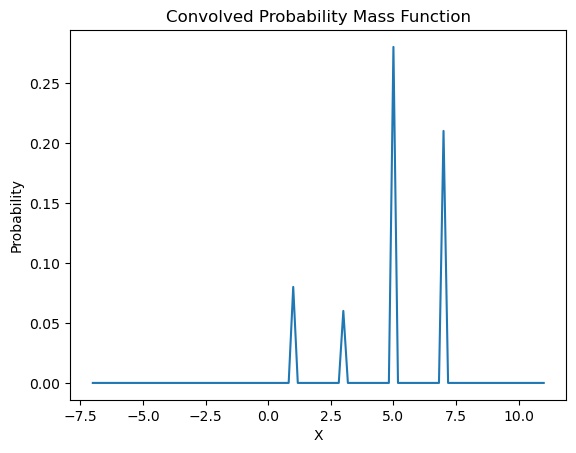

In [28]:
import plotly.graph_objects as go
import numpy as np

X = np.linspace(min(s1.a, s2.a) + min(s1.xk + s2.xk), max(s1.b, s2.b) + max(s1.xk + s2.xk), 100)

plt.plot(X, [y.pmf(z) for z in X])
plt.xlabel('X')
plt.ylabel('Probability')
plt.title('Convolved Probability Mass Function')
plt.show()

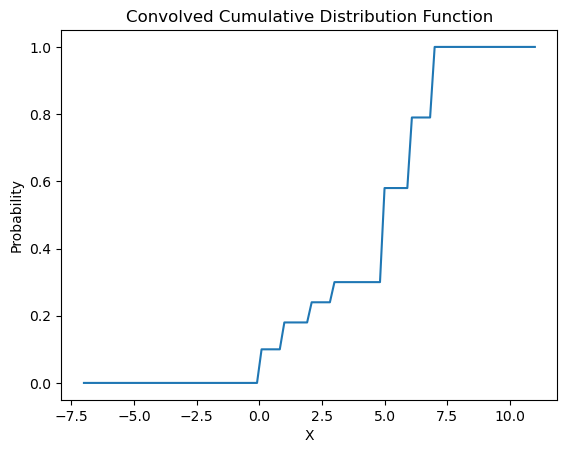

In [29]:
plt.plot(X, [y.cdf(z) for z in X])
plt.xlabel('X')
plt.ylabel('Probability')
plt.title('Convolved Cumulative Distribution Function')
plt.show()

## Same as (2), but convolutions of independent continuous random variables?

In [30]:
from scipy.stats import distributions as iid
from scipy.integrate import quad
import numpy as np

class ConvolvedTwoContinuous(iid.rv_continuous):

    """Convolve (add) a continuous rv x1 and another continuous rv x2,
       returning the resulting cdf."""

    def __init__(self,x1,x2):
        self.continuous_rv1 = x1
        self.continuous_rv2 = x2
        super(ConvolvedTwoContinuous, self).__init__(name="ConvolvedTwoContinuous")
        
    def _cdf(self,z):
        F=0
        x1 = self.continuous_rv1
        x2 = self.continuous_rv2
        
        # use CDF of x1
        F = quad(lambda x: x1.cdf(x)*x2.pdf(z-x), -np.inf, np.inf)
        
        return F

    def _pdf(self,z):
        f=0
        x1 = self.continuous_rv1
        x2 = self.continuous_rv2
        
        f = quad(lambda x: x1.pdf(x)*x2.pdf(z-x), -np.inf, np.inf)
        
        return f

In [31]:
x1 = iid.norm()
x2 = iid.norm(loc=1, scale=2)

y = ConvolvedTwoContinuous(x1,x2)

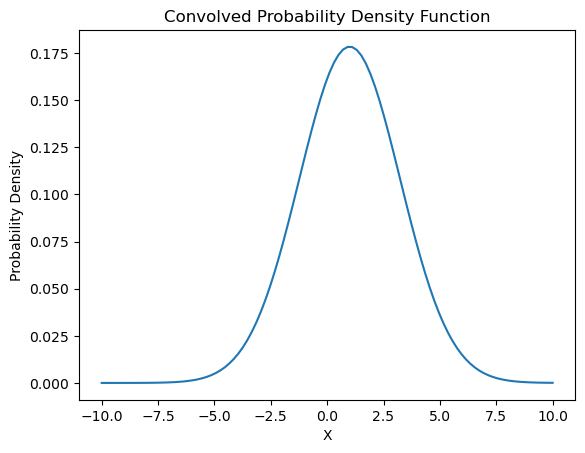

In [32]:
X = np.linspace(-10, 10, 100).tolist()

plt.plot(X, [y.pdf(z) for z in X])
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Convolved Probability Density Function')
plt.show()

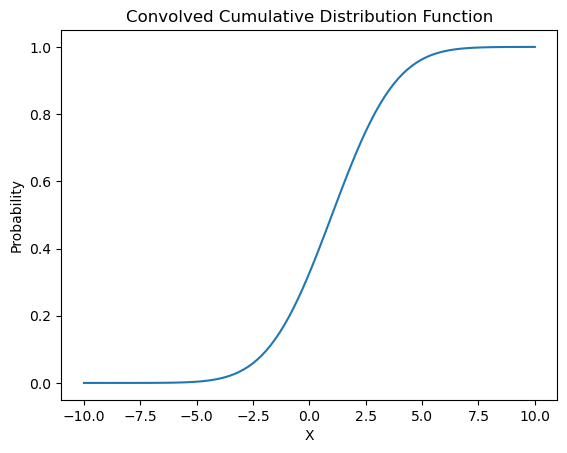

In [33]:
plt.plot(X, [y.cdf(z) for z in X])
plt.xlabel('X')
plt.ylabel('Probability')
plt.title('Convolved Cumulative Distribution Function')
plt.show()

# Problem 4: General Weighted Linear Regressions

General weighted linear regressions are techniques that are typically used to deal with unequal variance across observations (i.e. heteroskedasticity) in our data.

List of different regression estimators:

**Generalized Least Squares:** This does belong to the class of general weighted linear regressions. In generalized least squares, we modify the classic linear regression specification $y = \beta X + \epsilon$ to be $C y = C\beta X + C \epsilon$ where $C$ represents the Cholesky decomposition of the variance-covariance matrix. In this decomposition, $C$ is a lower triangular matrix obtained from the decomposition. $T$ is not random: it is matrix derived from the variance-covariance matrix of the errors.

**Ordinary Least Squares:** We could consider this as belonging to the class of general weighted linear regressions, if we considered OLS to be a specific case of the generalized least squares. Generalized least squares uses the C matrix, based on the variance-covariance matrix, to deal with heteroskedasticity in the data; if there was no heteroskedasticity in the data, then the C matrix would be derived as an identity matrix, in which case it would be exactly equivalent to the OLS formulation. As such, we could define the OLS as a particular case of generalized least squares where $C = I$, such that it has the form $I Y = I \beta X + I \epsilon$. Again, the same reasons as above, $I$ wouldn't describe the weighting matrix, in this case $I$, as random.

**Logistic Regression:** I would argue that the logit model does not belong to the class of weighted linear regressions. The most obvious reason being that it takes on a fundamentally different formulation: instead of estimating a continuous Y-term on the left-hand side of the equation, this is replaced by a probability estimate for a binary variable (so it is fundamentally more of a classification than a regression problem), and the right hand is specified as a logit function, where there is no similar error term. Furthermore, it is not linear: the relationship between the estimated coefficients and the outcome variable are based on log-odds, which create non-linear relationships. However, it should be pointed out that something that looks like OLS appears in the powers on the exponents on the right hand side, so it would be possible to implement a weighted logistic model by applying weights to observations in that part of the model. But, on the basis of these larger differences, I would say it is not a general weighted linear regression.

**Instrumental Variables/ 2SLS/ Control Functions:** I would argue that IVs and 2SLS do not belong to the class of weighted linear regressions. One reason is motivation: general weighted linear regressions are motivated to deal with the problem of heteroskedasticity, while IV techniques deal with endogeneity, so they have fundamentally different purposes. More technically, the IV/ 2SLS procedure does not involve weighting: rather, it involves performing multiple regressions in order to isolate the "good" variation that we are interested in the effect of. As such, I wouldn't classify these IV based approaches as general weighted linear regression techniques. But, there isn't really anything to stop you from incorporating them into a general weighted linear framework: I see no reason why you couldn't use an IV in combination with weighting techniques to simultaneously deal with heteroskedasticity and endogeneity.

# Problem 5: Simultaneous Equations

**When we defined the general weighted regression, we didn’t assume anything about the dimension of the different objects except that they were 'conformable.'**

**So: consider**

(2) $y = X\beta + u$; **with** $E[T'u] = 0$, **and where** $y = [y_1, y_2, ... , y_k]$, **so that if you had a sample of** $N$ **observations realizations of** $y$ **would be an** $N \times k$ **matrix.**

## What does our assumption of conformability then imply about the dimensions of $X, \beta, T$, and $u$?

Our assumption of conformability implies that $X$ is $N \times \ell$, $\beta$ is $\ell \times k$, $T$ is $N \times \ell$, and $u$ is $N \times k$.

## Could you use the estimator we developed in `weighted_regression.ipynb` to estimate this system of simultaneous equations?

No, because that estimator assumes that $y$ only has one column.

## Extend the code in `weighted_regression.ipynb` to actually estimate $\beta$ in the case with $k = 3$.

To construct a sample of observables $(y,X,T)$:

In [19]:
%matplotlib inline
import numpy as np
from scipy.stats import multivariate_normal

k = 3 # number of columns in y
l = 4 # number of columns in X
N = 100 # sample size

mu = [0]*l
Sigma = [
    [1,0.5,0,0.2],
    [0.5,2,0,0],
    [0,0,3,0],
    [0.2,0,0,1.5]]
T = multivariate_normal(mu,Sigma)

u = multivariate_normal([0]*k, 0.5)

beta = np.array(
    [[0.5, 0.7, 0.9],
     [1, 1.2, 1.4],
     [2, 2.2, 2.4],
     [3, 3.2, 3.4]])

D = np.random.random(size=(N, l)) # Generate random matrix

# Now: Transform rvs into a sample
T = T.rvs(N)

u = u.rvs(N) # Replace u with a sample

X = (T**3)*D  # element-wise multiplication

y = X@beta + u # Note use of @ operator for matrix multiplication

In the classical case we were trying to solve a linear system that took the form $Ab=0$, with $A$ a square matrix.  In the present case we're also trying to solve a linear system, but with a matrix $A$ that may have more rows than columns.  Provided the rows are linearly independent, this implies that we have an **overidentified** system of equations.  We'll return to the implications of this later, but for now this also calls for a different numerical approach, using `np.linalg.lstsq` instead of `np.linalg.solve`.

In addition, since $y$ is $N \times k$, we need to use the full formula to solve for $\hat{\beta}$:

$\hat{\beta} = (X'TT'X)^{-1} (X'TT'y)$

In [20]:
from scipy.linalg import inv, sqrtm

b = np.linalg.lstsq((X.T@T)@(T.T@X), (X.T@T)@(T.T@y), rcond=None)[0] # lstsq returns several results

print(b)

[[0.49163051 0.74501305 0.90883294]
 [0.97656988 1.20575962 1.41626366]
 [1.99584047 2.21302453 2.39798864]
 [3.04425505 3.22464214 3.34642498]]


## What additional assumptions are necessary to estimate the distribution of the estimator of $\beta$?

We must make an assumption about homoskedasticity or heteroskedasticity of $u$ in order to estimate the variance-covariance matrix and standard errors for our estimate of $\beta$.

# Problem 7: Food expenditures in India

The NSS surveys in India pioneered (in considerable part due to Mahalanobis) a wide variety of methodological innovations in sampling, questionnaire design, and have been among the most ambitious regularly collected data on household behavior and characteristics until recently. The most recently publicly released data on household expenditures was the “68th round”, collected in 2011–12. (More recent data has been collected, but suppressed for political reasons.) Data on householdlevel total food (and a few other non-durable) expenditures from the 68th round is available here, in the file total_expenditures.parquet. (You can use the pandas.read_parquet method to read these files–you may need to install some additional dependencies such as pyarrow.)

## Use these data to produce a figure describing the distribution of non-durable expenditures across households, measured in INR, using a Gaussian kernel and some bandwidth h. What are the strengths and weaknesses of your figure in terms of what it conveys about the underlying distribution? Can weaknesses be addressed by choosing a different bandwidth or kernel? (Nothing formal required here—I encourage you to simply play around.)

           total_value
j                     
410001101         7813
410001102         3573
410001103         9359
410001201         5671
410001202         6169
...                ...
799981301         3842
799982101         2736
799982201         3378
799982202         3221
799982301         3777

[101660 rows x 1 columns]


Text(0.5, 1.0, 'Food Expenditures in India (INR)')

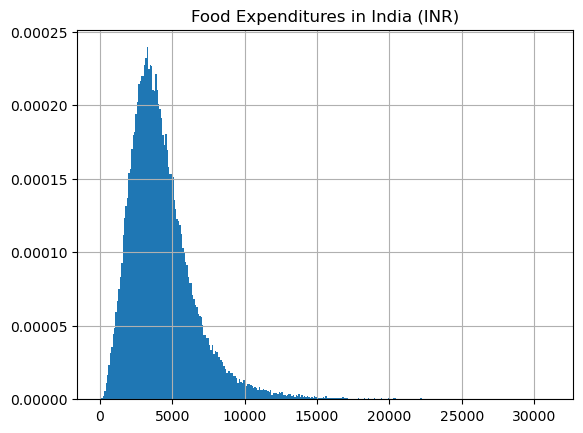

In [21]:
data1 = pd.read_parquet("../../total_expenditures.parquet")

print(data1)

data = pd.Series(data1["total_value"]) #no filter, it has some outliers
# Filter outliers
S = data[abs(data- data.mean()) <= 10*data.std()] ##notice 10 times from STD, only extreme outliers

# Define the Gaussian kernel
k = lambda u: np.exp(-(u**2)/2)/np.sqrt(2*np.pi) 
def kernel_estimator(X,h):
    return lambda x: k((X-x)/h).mean()/h

# Plot the probability density function (PDF) using a custom kernel function.
def plot_pdf(x, npts=100, ax=None, kernel_func=None, bandwidth=None):
    """
    Plot the probability density function (PDF) using a custom kernel function.
    
    Parameters:
    - x: Pandas Series or array-like object containing the data.
    - npts: Number of points for plotting.
    - ax: Matplotlib Axes object for plotting.
    - kernel_func: Custom kernel function.
    - bandwidth: Bandwidth parameter for the kernel function.
    """
    
    if ax is None:
        fig,ax = plt.subplots()

    # Calculate the kernel density estimate (KDE) using the custom kernel function
    if kernel_func is None:
        kde = x.plot.kde(ax=ax)
    else:
        kde_values = [kernel_func(x_i) for x_i in np.linspace(x.min(), x.max(), npts)]
        ax.plot(np.linspace(x.min(), x.max(), npts), kde_values, label=f'Custom KDE (Bandwidth={bandwidth})')
    
    # Set the x-axis limits based on the data range
    ax.set_xlim(x.min(), x.max() )
    
    # Add legend if using custom kernel function
    if kernel_func is not None:
        ax.legend()
    
    return ax

#Histogram
S.hist(bins=int(np.sqrt(len(S))),density=True)
plt.title('Food Expenditures in India (INR)')

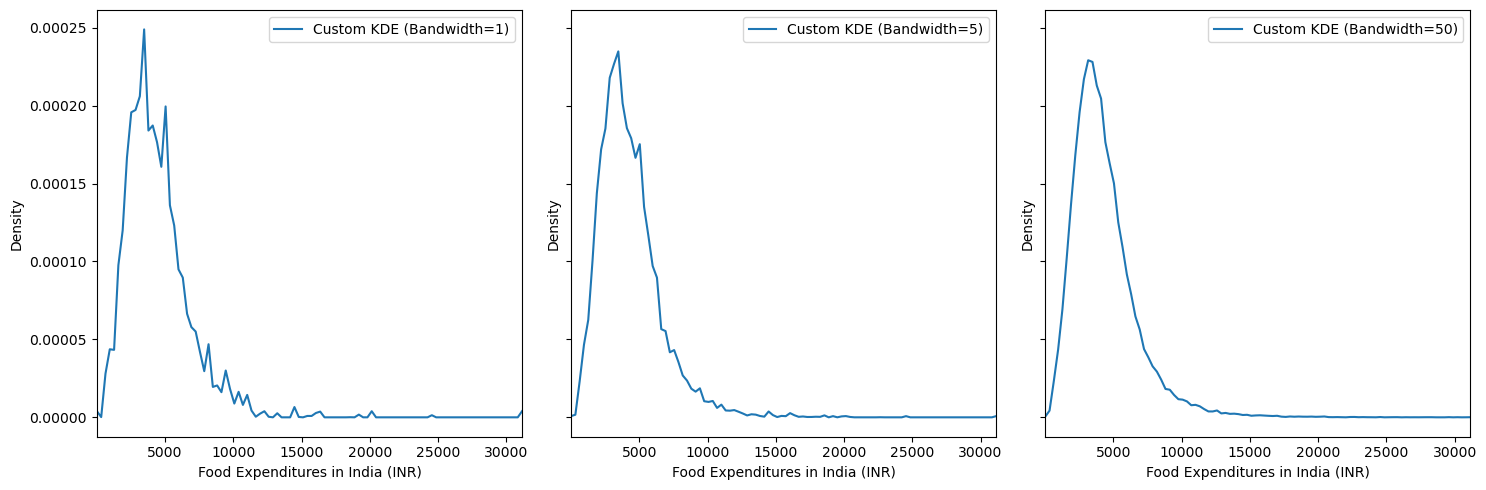

In [22]:
bandwidths = [1,5,50]
fig, axes = plt.subplots(nrows=1,ncols=len(bandwidths), figsize=(15, 5), sharey=True)

for i, bandwidth in enumerate(bandwidths):
    kernel = kernel_estimator(S, bandwidth)
    ax = axes[i] if len(bandwidths) > 1 else axes
    plot_pdf(S, ax=ax, kernel_func=kernel, bandwidth=bandwidth)
    ax.set_ylabel('Density')
    ax.set_xlabel('Food Expenditures in India (INR)')


plt.tight_layout()
plt.show()

According to our lectures, Hansen (Probability, &sect; 17.4) develops an expression for the bias of
the  kernel density estimator:
$$\mbox{Bias}(x) = \int k(u)\left(f(x+hu)-f(x)\right)du.$$
Thus, bias depends only on the kernel, the bandwidth, and the density $f$.

We see that a greater bandwidth gives us more precision but also more volatility and variance.

## Once you’ve arrived at some favorite kernel & bandwidth (say $\mathrm{f}^{h}(x)$) describing the density of expenditures, can you use the “inverse Jacobian” rule to describe instead the density of log expenditures? Write code to produce this figure

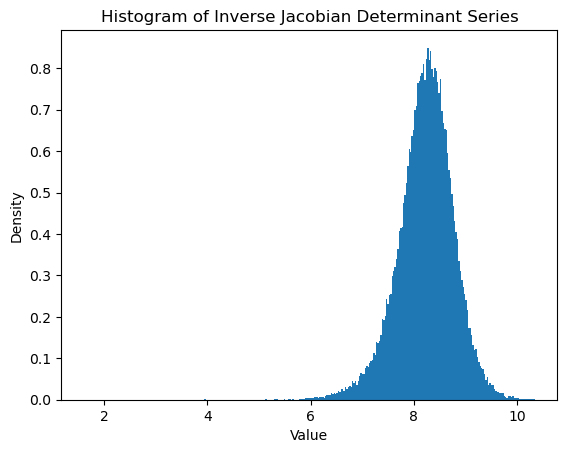

In [23]:
import sympy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data_series' is your data series
data_series = S
data_series = np.log(data_series)

# Define the variable and the logarithmic transformation function
x = sp.Symbol('x')
log_y = sp.log(x)  # Logarithmic transformation function

# Compute the Jacobian matrix
J = sp.Matrix([[sp.diff(log_y, x)]])

# Compute the determinant of the Jacobian matrix
det_J = J.det()

# Compute the inverse Jacobian determinant
inv_det_J = 1 / det_J

# Evaluate the inverse Jacobian determinant for each value in the data series
inv_det_series = []
for val in data_series:
    try:
        inv_det_series.append(float(inv_det_J.subs(x, val)))
    except (sp.ZeroDivisionError, ValueError, TypeError):
        pass

# Plot histogram of the inverse Jacobian determinant series
plt.hist(inv_det_series, bins=int(np.sqrt(len(inv_det_series))), density=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Inverse Jacobian Determinant Series')
plt.show()

## Instead of the route you’ve taken in (2), choose some kernel & bandwidth to estimate the density of log expenditures directly. How do the approaches of (2) and (3) compare?

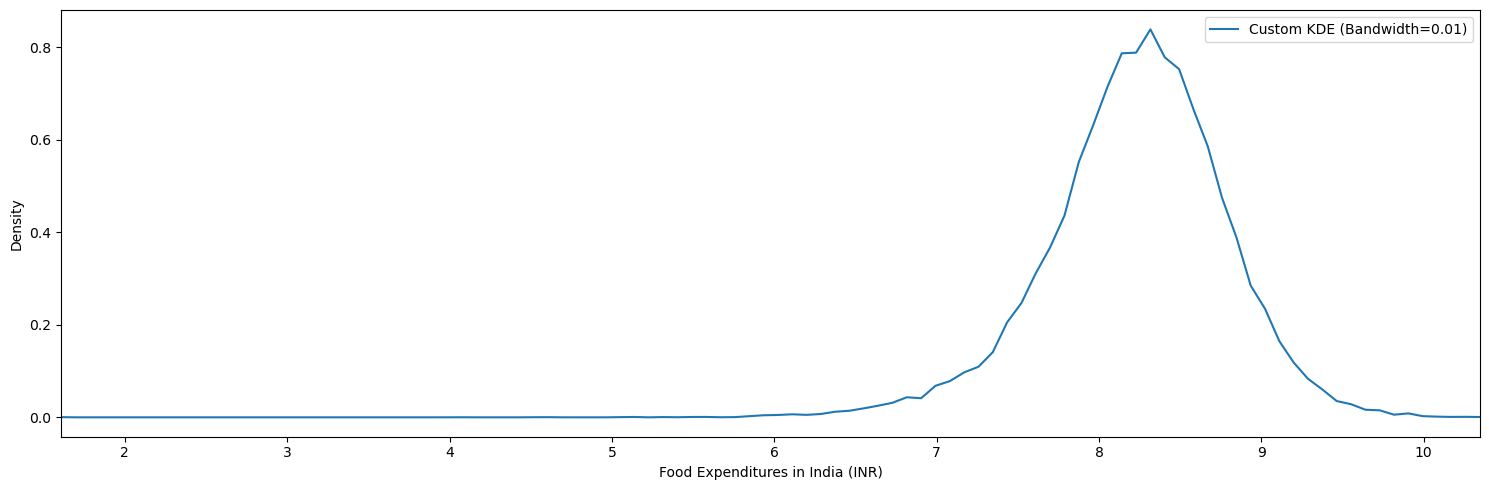

In [24]:
logS =np.log(S)

bandwidths = [.01]
fig, axes = plt.subplots(nrows=1,ncols=len(bandwidths), figsize=(15, 5), sharey=True)

for i, bandwidth in enumerate(bandwidths):
    kernel = kernel_estimator(logS, bandwidth)
    ax = axes[i] if len(bandwidths) > 1 else axes
    plot_pdf(logS, ax=ax, kernel_func=kernel, bandwidth=bandwidth)
    ax.set_ylabel('Density')
    ax.set_xlabel('Food Expenditures in India (INR)')


plt.tight_layout()
plt.show()

In approach (2), we first estimated the density of expenditures using a kernel and bandwidth and then applied the inverse Jacobian rule to transform this density into the density of log expenditures. This approach involves two steps: density estimation followed by transformation. On the other hand, in approach (3), we directly estimated the density of log expenditures using a kernel and bandwidth. This approach skips the intermediate step of estimating the density of expenditures and directly focuses on the density of log expenditures.

Complexity: Approach (2) involves two steps and thus may be considered slightly more complex than approach (3), which involves a single step of density estimation. Accuracy: Approach (2) may introduce some errors or approximations during the transformation step using the inverse Jacobian rule. Approach (3) directly estimates the density of interest (log expenditures) without any intermediate transformations, potentially leading to more accurate results.

Computational Efficiency: Approach (3) may be computationally more efficient as it involves a single step of density estimation compared to approach (2) with two steps.